In [62]:
# imports
import os, sys
import numpy as np
import matplotlib.pyplot as mplt
%matplotlib inline
from astropy.io import fits
from IPython.display import display, Math, Latex
import scipy.optimize as opt

import matplotlib.cm as cm

In [63]:
# Functions
def fnRVOrbitCircular( k, PhaseZero, Phase ):
    RVStar = k * np.sin( 2. * np.pi * ( Phase + PhaseZero ) )
    return RVStar


Buttleretal2006_RVs.txt
Naefetal2004_RVs.txt
Martinsetal2015_RVs.txt


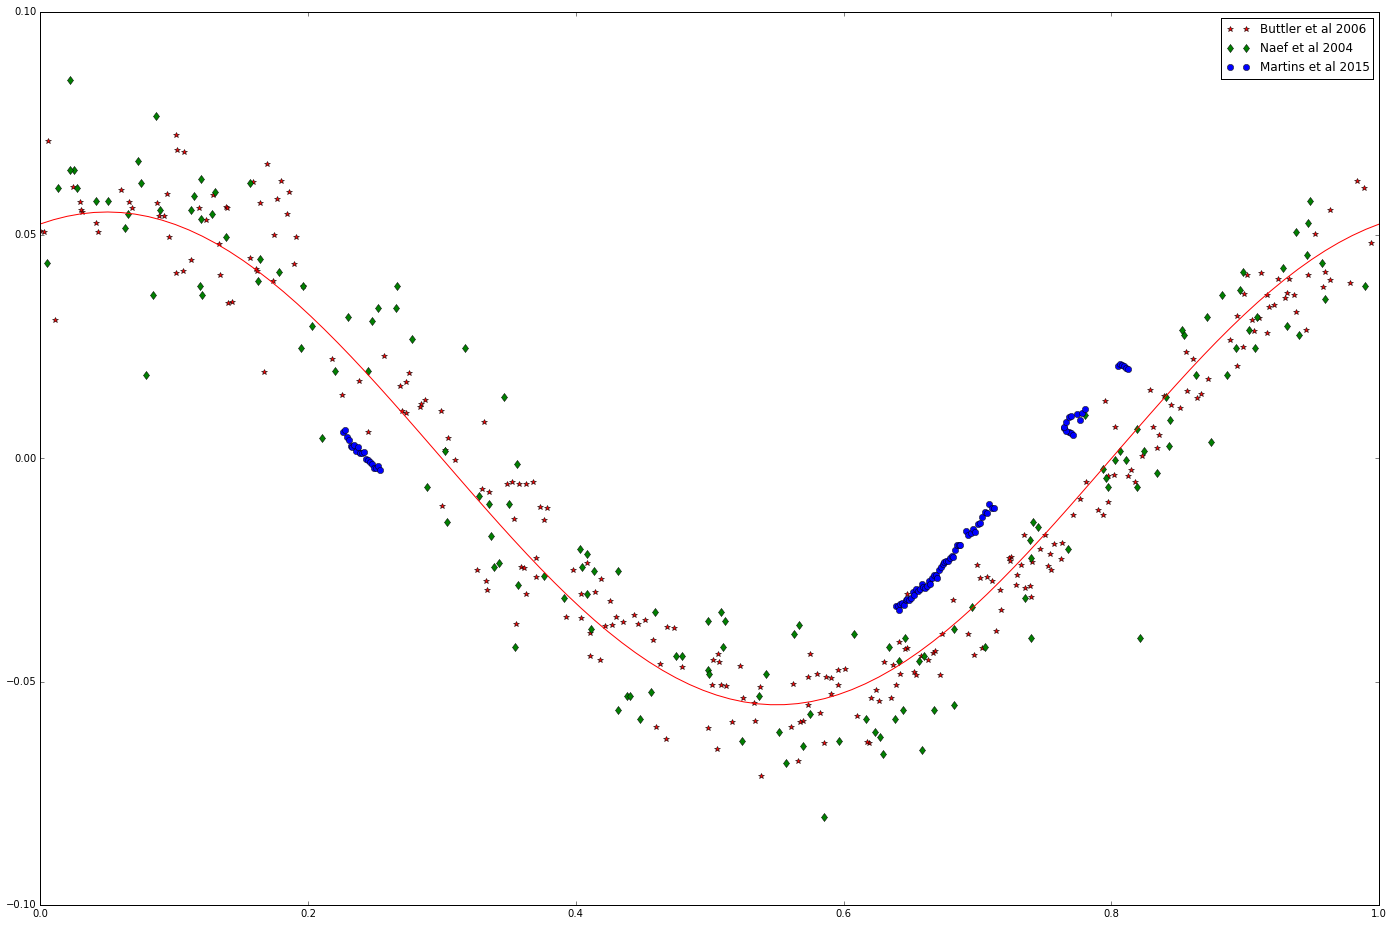

In [72]:
# get RVpointZeroJD = 2450000
t0 = 2456021.256#- pointZeroJD
period = 4.231

PhaseZero = 0.2
k1 = 55.2/1000.


RVData = {}
markerColors = 'rgbk'
markerstyle = '*do'

mplt.figure(figsize=(24,16), dpi = 100)
for RVFile, color, style in zip(RVFileList,markerColors, markerstyle):
    print RVFile
    RVData[RVFile] = np.genfromtxt('./RVs/{}'.format(RVFile),comments='#', delimiter='    ',autostrip = True)
    mplt.plot([((jd - t0)%period)/period for jd in RVData[RVFile][:, 0]],[rv - RVOffSet[RVFile] for rv in RVData[RVFile][:, 1]], '{}{}'.format(color, style) , label = RVFile.replace('_RVs.txt','').replace('etal',' et al '))
    
    #for JD, RV, RVErr in RVData[RVFile]:
     #   print '{:7.5f}    {:>7.4f}    {:.4f}'.format(JD+ pointZeroJD, RV , RVErr)
        
        
        
# theoretical orbit

theoPhases = np.linspace(0,1., num = 100)

theoRV = [fnRVOrbitCircular( k1, PhaseZero, phase )  for phase in theoPhases]
mplt.plot(theoPhases,theoRV, 'r')

mplt.legend()
mplt.show()
    
